<a href="https://colab.research.google.com/github/shubham2007-pro/5CS037/blob/main/Worksheet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To- Do- Task
# Problem 1- Data Read, Write and Inspect :


Task 1: Load the dataset (bank.csv)


In [5]:
from google.colab import files
uploaded = files.upload()

In [6]:
import pandas as pd
df = pd.read_csv("bank.csv")
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Task 2: Inspect the DataFrame

2(a) Columns with dtype = object

In [7]:
object_columns = df.select_dtypes(include="object").columns
object_columns


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

2(b) Unique values of those object columns

In [8]:
for col in object_columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 40)


Unique values in 'job':
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
----------------------------------------
Unique values in 'marital':
['married' 'single' 'divorced']
----------------------------------------
Unique values in 'education':
['tertiary' 'secondary' 'unknown' 'primary']
----------------------------------------
Unique values in 'default':
['no' 'yes']
----------------------------------------
Unique values in 'housing':
['yes' 'no']
----------------------------------------
Unique values in 'loan':
['no' 'yes']
----------------------------------------
Unique values in 'contact':
['unknown' 'cellular' 'telephone']
----------------------------------------
Unique values in 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
----------------------------------------
Unique values in 'poutcome':
['unknown' 'failure' 'other' 'success']
-----------

2(c) Total number of null values in each column

In [9]:
df.isnull().sum()


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


 3) Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
 ”.csv” with name ”banknumericdata.csv”

In [10]:
# Drop object dtype columns
df_numeric = df.drop(columns=object_columns)
# Save to CSV
df_numeric.to_csv("banknumericdata.csv", index=False)
df_numeric.head()


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


 4. Read ”banknumericdata.csv” and Find the summary statistics

In [11]:
df_num = pd.read_csv("banknumericdata.csv")
df_num.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Problem** 2- Data Imputations


 • Dataset for the Task: "medical_student.csv"

 1. Load the provided dataset and import in pandas DataFrame.

In [12]:
from google.colab import files
uploaded = files.upload()


Saving medical_students_dataset.csv to medical_students_dataset.csv


 1. Load the provided dataset and import in pandas DataFrame

In [14]:
import pandas as pd
df = pd.read_csv("medical_students_dataset.csv")
df

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,NaN,24.0,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No
199996,99997.0,29.0,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.0,198.0,No,Yes
199997,99998.0,34.0,Female,NaN,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0,NaN,No
199998,99999.0,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.0,225.0,No,No


 2. Check info of the DataFrame and identify column with missing (null) values

In [15]:
df.info()
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


,0
Student ID,20000
Age,20000
Gender,20000
Height,20000
Weight,20000
Blood Type,20000
BMI,20000
Temperature,20000
Heart Rate,20000
Blood Pressure,20000


 3. For the column with missing values fill the values using various techniques we discussed above. Try
 to explain why did you select the particular methods for particular column.
 4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
 {Hint: dataset.duplicated.sum()}

In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv("medical_students_dataset.csv") # Corrected filename
print("Original Dataset:")
print(df, "\n")

# 1. Check info and missing values
print("Dataset Info:")
df.info()
print("\nMissing Values in Each Column:")
print(df.isnull().sum(), "\n")

# 2. Imputation for missing values
print("Performing Imputation...")

# Identify numeric columns for imputation
numeric_cols_to_impute = ['Age', 'Height', 'Weight', 'BMI', 'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol']

# Identify categorical columns for imputation
categorical_cols_to_impute = ['Gender', 'Blood Type', 'Diabetes', 'Smoking']

# Impute numeric columns
for col in numeric_cols_to_impute:
    if col in df.columns and df[col].isnull().any():
        if col == 'Age': # Use median for Age due to potential skewness
            df[col] = df[col].fillna(df[col].median())
            print(f"Filled missing values in '{col}' with median: {df[col].median():.2f}")
        else: # Use mean for other numeric columns
            df[col] = df[col].fillna(df[col].mean())
            print(f"Filled missing values in '{col}' with mean: {df[col].mean():.2f}")

# Impute categorical columns
for col in categorical_cols_to_impute:
    if col in df.columns and df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
        print(f"Filled missing values in '{col}' with mode: '{mode_val}'")

# For 'Student ID', if a unique identifier is needed for missing values, it's a different strategy.
# For now, we will leave it as is or drop rows with missing ID if identification is critical.
# As per the task, let's confirm the remaining nulls. 'Student ID' is not a feature for analysis.

print("\nDataset After Filling Missing Values (null count per column):")
print(df.isnull().sum(), "\n")

# 3. Check for duplicate values
total_duplicates = df.duplicated().sum()
print("Total duplicate rows:", total_duplicates)

# 4. Remove duplicates if any
df = df.drop_duplicates()
print("Duplicates after removing:", df.duplicated().sum(), "\n")

# 5. Final cleaned dataset
print("Final Cleaned Dataset (first 5 rows and last 5 rows):")
print(df.head())
print(df.tail())

Original Dataset:
        Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0              1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1              2.0   NaN    Male  152.069157  47.630941          B        NaN   
2              3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3              NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4              5.0  23.0  Female         NaN  46.234173          O        NaN   
...            ...   ...     ...         ...        ...        ...        ...   
199995         NaN  24.0    Male  176.503260  95.756997          B  30.737254   
199996     99997.0  29.0  Female  163.917675  45.225194        NaN  16.831734   
199997     99998.0  34.0  Female         NaN  99.648914        NaN  33.189303   
199998     99999.0  30.0  Female  156.446944  50.142824          A  20.486823   
199999    100000.0  20.0  Female  153.927409  99.928405          O  42.175189   

        T

 3.2 Exercises- Data Cleaning and Transformations with ”Titanic Dataset”:
 Dataset Used: "titanic.csv"
 Problem- 1:
 Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
 Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
 median, maximum value, and minimum value of the ’Fare’ column?

In [19]:
from google.colab import files
uploaded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset.csv


Problem 1: Titanic Dataset – First-Class Fare Analysis
Step 1: Load the dataset

In [22]:
import pandas as pd
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Step 2: Subset the required columns

We only need: 'Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived'

In [23]:
titanic_subset = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
titanic_subset.head()


,Name,Pclass,Sex,Age,Fare,Survived
0,"Braund, Mr. Owen Harris",3,male,22.0,7.2500,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
2,"Heikkinen, Miss. Laina",3,female,26.0,7.9250,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
4,"Allen, Mr. William Henry",3,male,35.0,8.0500,0


Step 3: Filter rows where Pclass = 1 (first-class passengers)

In [24]:
first_class = titanic_subset[titanic_subset['Pclass'] == 1]
first_class.head()


,Name,Pclass,Sex,Age,Fare,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1


Step 4: Calculate statistics for the 'Fare' column

In [25]:
fare_mean = first_class['Fare'].mean()
fare_median = first_class['Fare'].median()
fare_max = first_class['Fare'].max()
fare_min = first_class['Fare'].min()


print("Fare Statistics for First-Class Passengers:")
print(f"Mean Fare: {fare_mean}")
print(f"Median Fare: {fare_median}")
print(f"Maximum Fare: {fare_max}")
print(f"Minimum Fare: {fare_min}")


Fare Statistics for First-Class Passengers:
Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


In [26]:
first_class.head()


,Name,Pclass,Sex,Age,Fare,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1


 Problem- 2:
 How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
 this out, drop them from your DataFrame.

Check for null values in the 'Age' column

In [27]:
null_age_count = first_class['Age'].isnull().sum()
print("Number of null values in 'Age':", null_age_count)


Number of null values in 'Age': 30


Drop rows where 'Age' is null

In [28]:
first_class = first_class.dropna(subset=['Age'])
print("Number of null values in 'Age' after dropping:", first_class['Age'].isnull().sum())


Number of null values in 'Age' after dropping: 0


 Problem- 3:
 The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka
tion:
 • ’C’ for Cherbourg
 • ’Q’ for Queenstown
 • ’S’ for Southampton
 Task:

1. One-Hot Encode the 'Embarked' Column

In [29]:
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
embarked_dummies.head()


,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


Add the new columns to the original DataFrame

In [31]:

df = pd.concat([df, embarked_dummies], axis=1)


Drop the original 'Embarked' column

In [32]:
df = df.drop(columns=['Embarked'])


In [33]:
print("Modified DataFrame with One-Hot Encoded 'Embarked':")
print(df.head())

Modified DataFrame with One-Hot Encoded 'Embarked':
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  \
0      0         A/5 21171   7.2500   NaN       False       False        True   
1      0          PC 17599  71.2833   C85        True       False       False   
2      0  STON/O2. 310128

 Problem- 4:
 Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual
ization to show how the survival distributions vary by gender.

Compute the mean survival rate by gender

In [34]:
mean_survival_by_sex = df.groupby('Sex')['Survived'].mean()
print(mean_survival_by_sex)


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


Visualize the survival distributions by gender

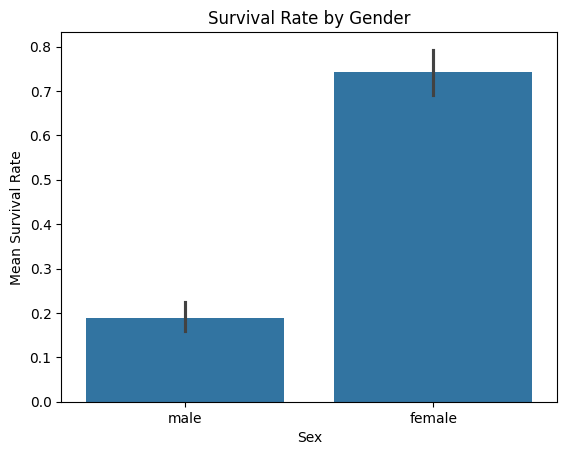

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.ylabel('Mean Survival Rate')
plt.show()


 Problem- 5:
 Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Me

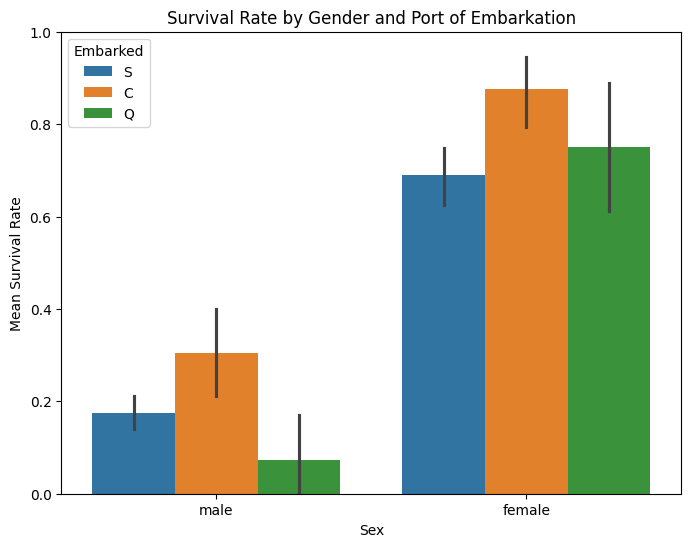

In [37]:

import seaborn as sns
import matplotlib.pyplot as plt

# Load the datase
df = pd.read_csv('Titanic-Dataset.csv')

# Display first few rows to check data
print(df.head())

# Filter only valid ports of embarkation
df_filtered = df[df['Embarked'].isin(['C', 'Q', 'S'])]

# Calculate mean survival rate by Sex and Embarked (optional)
mean_survival_by_sex_port = df_filtered.groupby(['Sex', 'Embarked'])['Survived'].mean()
print("Mean Survival Rate by Sex and Port:\n", mean_survival_by_sex_port)

# Visualization
plt.figure(figsize=(8,6))
sns.barplot(data=df_filtered, x='Sex', y='Survived', hue='Embarked')
plt.title('Survival Rate by Gender and Port of Embarkation')
plt.ylabel('Mean Survival Rate')
plt.ylim(0,1)  # Ensure y-axis is between 0 and 1
plt.show()
